Дано: данные о популярности имен для новорожденных, скачивается по ссылке. Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
FILE_SOURCE = 'names'

In [3]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(os.path.join(FILE_SOURCE, 'yob{}.txt'.format(year)),
    names=['Name','Gender','Count'])
names_all_step_1_year = pd.concat(names_by_year, names=['Year', 'Pos'])

In [4]:
names_all_step_1_year.head()

Name Gender  Count
Year Pos                        
1900 0        Mary      F  16706
     1       Helen      F   6343
     2        Anna      F   6114
     3    Margaret      F   5304
     4        Ruth      F   4765

In [5]:
names_dynamics_step_1_year = names_all_step_1_year.groupby([names_all_step_1_year.index.get_level_values(0), 'Name']).sum()
names_dynamics_step_1_year.head()

Count
Year Name        
1900 Aaron    103
     Abbie    112
     Abby       7
     Abe       56
     Abel      15

In [6]:
names_dynamics_step_1_year.query('Name == ["Ruth", "Robert"]').unstack('Name').head()

Count        
Name  Robert    Ruth
Year                
1900  3845.0  4781.0
1901  2559.0  3989.0
1902  3201.0  4401.0
1903  3057.0  4531.0
1904  3427.0  4915.0

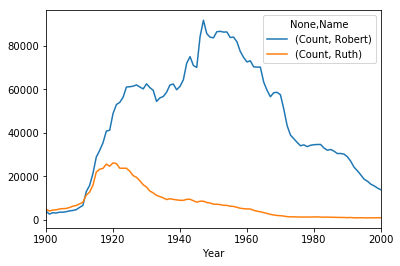

In [7]:
names_dynamics_step_1_year.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

In [8]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(os.path.join(FILE_SOURCE, 'yob{}.txt'.format(year)),
    names=['Name','Gender','Count'])
names_all_step_5_year = pd.concat(names_by_year, names=['Year', 'Pos'])

In [9]:
names_all_step_5_year.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

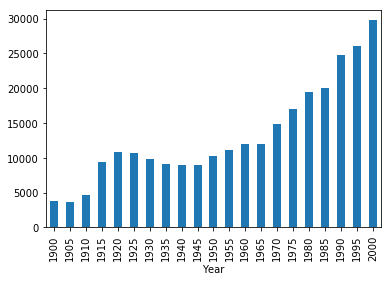

In [10]:
names_all_step_5_year['Name'].groupby('Year').count().plot.bar()

3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [11]:
names_1950 = pd.read_csv('names/yob{}.txt'.format(1950),names=['Name','Gender','Count'])
names_1950.head()

,Name,Gender,Count
0,Linda,F,80439
1,Mary,F,65485
2,Patricia,F,47948
3,Barbara,F,41559
4,Susan,F,38019


In [12]:
names_for_pie = names_1950.query('Name.str[0] == "R"').groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_for_pie

,Count
Name,
Robert,83778
Richard,51111
Ronald,29985
Roger,12578
Raymond,11218
Rebecca,9443
Ruth,7138
Roy,6491
Rita,6439


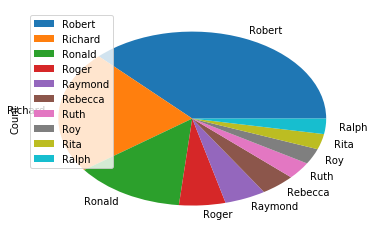

In [13]:
names_for_pie.plot.pie(y='Count')

4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [14]:
names_100_years = names_all_step_1_year.groupby('Name').sum().sort_values(by='Count', ascending=False).reset_index()
names_100_years.head(10)

,Name,Count
0,James,4810284
1,John,4739898
2,Robert,4638931
3,Michael,4023398
4,Mary,3853689
5,William,3655345
6,David,3351321
7,Richard,2493115
8,Joseph,2289760
9,Charles,2189677


In [15]:
def cons_count(str):
    return sum([1 if a not in 'aeiuyo' else 0 for a in str])

In [16]:
names_100_years['Cons_count'] = names_100_years.apply(lambda row: cons_count(row.Name), axis=1)
names_100_years.head()

,Name,Count,Cons_count
0,James,4810284,3
1,John,4739898,3
2,Robert,4638931,4
3,Michael,4023398,4
4,Mary,3853689,2


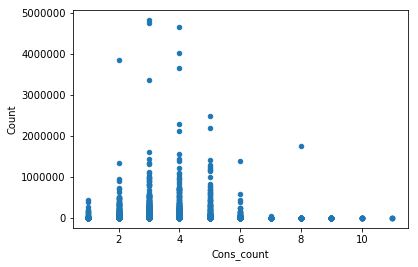

In [17]:
names_100_years.plot.scatter(x='Cons_count', y='Count')